https://github.com/mapbiomas-brazil

https://plataforma.brasil.mapbiomas.org/

In [ ]:
!pip install geobr
!pip install descartes
!pip install mapclassify

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
import geobr
from tqdm import tqdm
import seaborn as sns

In [3]:
biomas = geobr.read_biomes(year = 2019)
states = geobr.read_state(year = 2018)
br = geobr.read_country(year = 2018)

am = biomas.loc[biomas['name_biome'] == 'Amazônia']
ce = biomas.loc[biomas['name_biome'] == 'Cerrado']

# Amazon rainforest

In [4]:
df = pd.read_csv(f'Data/Natural_antropico_historico_Amazonia.csv')
# Dados de área em hectares

In [5]:
df.head(5)

,Classe,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1. Natural,4.075738e+08,4.072187e+08,4.058791e+08,4.044500e+08,4.033824e+08,4.026378e+08,4.016646e+08,3.999131e+08,3.982739e+08,...,3.669875e+08,3.663556e+08,3.654451e+08,3.643854e+08,3.636287e+08,3.629164e+08,3.618581e+08,3.608062e+08,3.589810e+08,3.555660e+08
1,1.1. Formação Florestal,3.582191e+08,3.578043e+08,3.564304e+08,3.549409e+08,3.535820e+08,3.529752e+08,3.519903e+08,3.502599e+08,3.486761e+08,...,3.183220e+08,3.177151e+08,3.168744e+08,3.158952e+08,3.151725e+08,3.144431e+08,3.132978e+08,3.122455e+08,3.104081e+08,3.082518e+08
2,1.2. Formação Savânica,1.468463e+06,1.387819e+06,1.392306e+06,1.360951e+06,1.330390e+06,1.306827e+06,1.287620e+06,1.262409e+06,1.247196e+06,...,1.527602e+06,1.548205e+06,1.582117e+06,1.586421e+06,1.579913e+06,1.553310e+06,1.523338e+06,1.522907e+06,1.518591e+06,1.519799e+06
3,1.3. Mangue,7.594337e+05,7.588579e+05,7.570641e+05,7.601131e+05,7.641213e+05,7.689884e+05,7.718164e+05,7.719198e+05,7.703766e+05,...,7.556693e+05,7.576971e+05,7.534425e+05,7.525612e+05,7.513984e+05,7.511245e+05,7.531258e+05,7.489232e+05,7.535572e+05,7.530406e+05
4,1.4. Floresta Alagável,1.928982e+07,1.923281e+07,1.920429e+07,1.921675e+07,1.913821e+07,1.922924e+07,1.917847e+07,1.912739e+07,1.909819e+07,...,1.918347e+07,1.917246e+07,1.914485e+07,1.908916e+07,1.907030e+07,1.908010e+07,1.904838e+07,1.902933e+07,1.895780e+07,1.885888e+07


In [6]:
df['Classe'].unique()

array(['1. Natural', '1.1. Formação Florestal', '1.2. Formação Savânica',
       '1.3. Mangue', '1.4. Floresta Alagável', '1.5. Restinga Arbórea',
       '1.6. Campo Alagado e Área Pantanosa', '1.7. Formação Campestre',
       '1.8. Apicum', '1.9. Afloramento Rochoso',
       '1.10. Restinga Herbácea', '1.11. Outras Formações não Florestais',
       '1.12. Praia, Duna e Areal', '1.13. Rio, Lago e Oceano',
       '2. Antrópico', '2.1. Pastagem', '2.2. Soja', '2.3. Cana',
       '2.4. Arroz', '2.5. Algodão (beta)',
       '2.6. Outras Lavouras Temporárias', '2.7. Café', '2.8. Citrus',
       '2.9. Dendê (beta)', '2.10. Outras Lavouras Perenes',
       '2.11. Silvicultura', '2.12. Mosaico de Usos',
       '2.13. Área Urbanizada', '2.14. Mineração', '2.15. Aquicultura',
       '3. Não definido', '3.1. Outras Áreas não Vegetadas',
       '3.2. Não observado'], dtype=object)

In [7]:
tot_area = df['2022'].sum()

In [10]:
areas_amazon_biome = {}
areas_amazon_biome['Ano'] = [i for i in range(1985,2023)]
areas_amazon_biome['Uso_antrópico'] = []
areas_amazon_biome['Vegetação_natural'] = []
areas_amazon_biome['Area_total'] = []
areas_amazon_biome['Area_uso_antrópico'] = []
areas_amazon_biome['Area_vegetação_natural'] = []
areas_amazon_biome['Area_outros'] = []
areas_amazon_biome['Outros'] = []

for i in tqdm(range(1985,2023)):
    # print(df.iloc[14])
    antro_area = df.iloc[14][f'{i}']
    natural_area = df.iloc[0][f'{i}']
    outros = df.iloc[30][f'{i}']
    tot_area = antro_area + natural_area + outros

    areas_amazon_biome['Uso_antrópico'].append(antro_area/tot_area)
    areas_amazon_biome['Area_uso_antrópico'].append(antro_area)
    areas_amazon_biome['Area_vegetação_natural'].append(natural_area)
    areas_amazon_biome['Vegetação_natural'].append(natural_area/tot_area)
    areas_amazon_biome['Area_total'].append(tot_area)
    areas_amazon_biome['Area_outros'].append(outros)
    areas_amazon_biome['Outros'].append(outros/tot_area)

100%|██████████| 38/38 [00:00<00:00, 848.35it/s]


In [11]:
areas_amazon_biome = pd.DataFrame(areas_amazon_biome)

In [12]:
areas_amazon_biome.head(5)

,Ano,Uso_antrópico,Vegetação_natural,Area_total,Area_uso_antrópico,Area_vegetação_natural,Area_outros,Outros
0,1985,0.033132,0.966859,4.215442e+08,1.396672e+07,4.075738e+08,3731.837109,0.000009
1,1986,0.033975,0.966017,4.215442e+08,1.432177e+07,4.072187e+08,3736.386404,0.000009
2,1987,0.037152,0.962839,4.215442e+08,1.566141e+07,4.058791e+08,3717.126833,0.000009
3,1988,0.040543,0.959448,4.215442e+08,1.709060e+07,4.044500e+08,3654.526422,0.000009
4,1989,0.043076,0.956916,4.215442e+08,1.815824e+07,4.033824e+08,3583.763194,0.000009


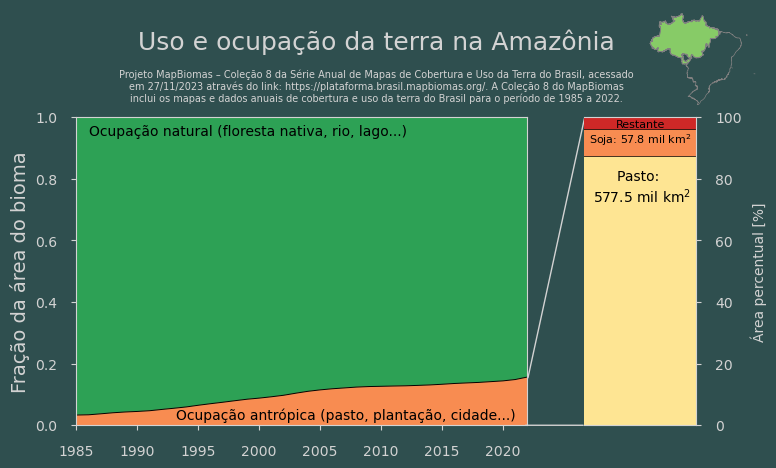

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (8,4), gridspec_kw = {'width_ratios': [4,1]})

ax[0].fill_between(areas_amazon_biome['Ano'], 0, 1, color = 'grey')
ax[0].fill_between(areas_amazon_biome['Ano'], 0,
                 areas_amazon_biome['Vegetação_natural'] + areas_amazon_biome['Uso_antrópico'],
                 color = sns.color_palette('RdYlGn_r', 7)[0])
ax[0].fill_between(areas_amazon_biome['Ano'], 0,
                 areas_amazon_biome['Uso_antrópico'],
                 color = sns.color_palette('RdYlGn_r', 7)[5])
ax[0].plot(areas_amazon_biome['Ano'], areas_amazon_biome['Uso_antrópico'],
                 color = 'black', lw = 0.7)

ax[0].text(1986, 0.94, 'Ocupação natural (floresta nativa, rio, lago...)',
           color = 'black', fontsize = 10)
ax[0].text(2021, 0.02, 'Ocupação antrópica (pasto, plantação, cidade...)',
           color = 'black', fontsize = 10, ha = 'right')
ax[0].set_xlim(1985, 2022)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Fração da área do bioma', fontsize = 14, color = 'lightgrey')
ax[0].tick_params(axis='both', colors='lightgrey', pad=10)
for spine in ax[0].spines.values():
    spine.set_edgecolor('lightgrey')



total_antro_area = areas_amazon_biome['Area_uso_antrópico'][37]

ax[1].bar(0, 1,
          color = sns.color_palette('RdYlGn_r', 11)[10])
# ax[1].bar(0, df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True).head(3)['2022'].sum()/total_antro_area,
#           color = sns.color_palette('RdYlGn_r', 11)[9], edgecolor = 'black', lw = 0.5)
ax[1].bar(0, df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True).head(2)['2022'].sum()/total_antro_area,
          color = sns.color_palette('RdYlGn_r', 11)[8], edgecolor = 'black', lw = 0.5)
ax[1].bar(0, df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True).head(1)['2022'].sum()/total_antro_area,
          color = sns.color_palette('RdYlGn_r', 11)[6], edgecolor = 'black', lw = 0.5)

ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[1].set_ylim(0, 1)
ax[1].set_xlim(-0.3, 0.3)
ax[1].set_ylabel('Área percentual [%]', labelpad = 6, color='lightgrey')
ax[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax[1].set_yticklabels([0, 20, 40, 60, 80, 100])
ax[1].set_xticks([])
ax[1].tick_params(axis='both', colors='lightgrey', pad=10)
ax[1].spines['left'].set_visible(False)
for spine in ax[1].spines.values():
    spine.set_edgecolor('lightgrey')

area_pasture = df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True)['2022'][0]
area_soybean = df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True)['2022'][1]

ax[1].text(0, 0.95*df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True).head(1)['2022'].sum()/total_antro_area,
           f"Pasto: \n {area_pasture/1e5:.1f} mil km$^2$",
           ha = 'center', va = 'top')
ax[1].text(0, 0.99*df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True).head(2)['2022'].sum()/total_antro_area,
           f'Soja: {area_soybean/1e5:.1f} mil km$^2$', ha = 'center', va = 'top', fontsize = 8)
ax[1].text(0, 0.995, 'Restante', ha = 'center', va = 'top', fontsize = 8)

ax[0].annotate('', xy=(1, 0.145), xycoords='axes fraction', xytext=(1.128, 1.005),
            arrowprops=dict(arrowstyle="-", color='lightgrey', lw = 1))
ax[0].annotate('', xy=(0.99, 00), xycoords='axes fraction', xytext=(1.13, 0),
            arrowprops=dict(arrowstyle="-", color='lightgrey', lw = 1))

fig.text(0.5, 1.05, 'Uso e ocupação da terra na Amazônia', fontsize = 18, ha = 'center',
         color = 'lightgrey')
fig.text(0.5, 0.92, 'Projeto MapBiomas – Coleção 8 da Série Anual de Mapas de Cobertura e Uso da Terra do Brasil, acessado'
'\n'
'em 27/11/2023 através do link: https://plataforma.brasil.mapbiomas.org/. A Coleção 8 do MapBiomas'
'\n'
'inclui os mapas e dados anuais de cobertura e uso da terra do Brasil para o período de 1985 a 2022.',
         ha = 'center', color = 'lightgrey', fontsize = 7)
newax = fig.add_axes([0.73, 0.9, 0.25, 0.25], anchor = 'NE', zorder = 0)
am.plot(facecolor = sns.color_palette('RdYlGn_r', 7)[1], edgecolor='grey', figsize=(6,6),
              lw = 0.5, alpha = 1, ax = newax)
br.plot(facecolor = 'none', edgecolor='grey', figsize=(6,6),
              lw = 0.5, alpha = 1, ax = newax)
newax.axis('off')

fig.patch.set_facecolor('darkslategrey')
# plt.savefig('Plots/Uso_terra_Amazonia_historico.png', dpi = 300, bbox_inches = 'tight')
plt.show()

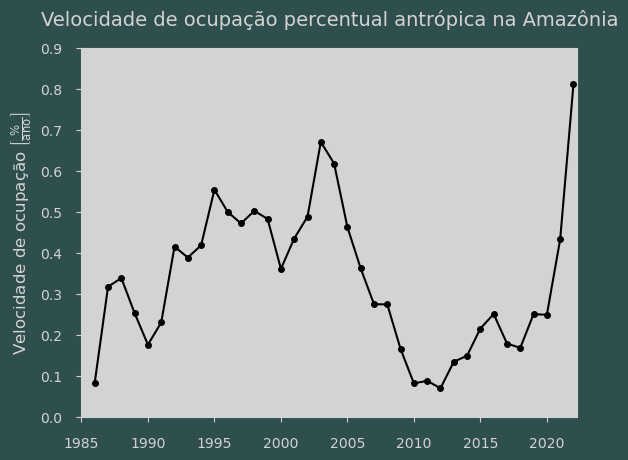

In [17]:
fig, ax = plt.subplots()
plt.plot(areas_amazon_biome['Ano'][1:], 100*np.diff(areas_amazon_biome['Uso_antrópico'])/np.diff(areas_amazon_biome['Ano']),
         color = 'black', marker = 'o', markersize = 4)
plt.xlim(1985,2022.3)
plt.ylim(0, 0.9)

plt.ylabel(r'Velocidade de ocupação $\left[ \frac{\%}{\mathrm{ano}} \right]$', fontsize = 12, color = 'lightgrey')
ax.tick_params(axis='both', colors='lightgrey', pad=10)
for spine in ax.spines.values():
    spine.set_edgecolor('lightgrey')

plt.title('Velocidade de ocupação percentual antrópica na Amazônia', fontsize = 14, color = 'lightgrey',
          pad = 16)
fig.patch.set_facecolor('darkslategrey')
for ax in fig.axes:
    ax.patch.set_facecolor('lightgrey')

# plt.savefig('Plots/Velocidade_ocupacao_Amazonia.png', dpi = 400, bbox_inches = 'tight')
plt.show()

In [18]:
#### Cenário 1 v = cte
v = np.diff(areas_amazon_biome['Uso_antrópico'])[-1]

### Cenário 2 v = at
a = np.mean(np.diff(np.diff(areas_amazon_biome['Uso_antrópico'])[-11:]))

### Cenário 3 v = -rt
r = 0.002

In [19]:
areas_amazon_biome_cenario1 = {}
areas_amazon_biome_cenario1['Ano'] = [i for i in range(1985,2023)]
areas_amazon_biome_cenario1['Uso_antrópico'] = []
areas_amazon_biome_cenario1['Vegetação_natural'] = []

for i in tqdm(range(1985,2023)):
    # print(df.iloc[14])
    antro_area = df.iloc[14][f'{i}']
    natural_area = df.iloc[0][f'{i}']
    outros = df.iloc[30][f'{i}']
    tot_area = antro_area + natural_area + outros

    areas_amazon_biome_cenario1['Uso_antrópico'].append(antro_area/tot_area)
    areas_amazon_biome_cenario1['Vegetação_natural'].append(natural_area/tot_area)

for i in tqdm(range(2023,2101)):
    areas_amazon_biome_cenario1['Ano'].append(i)
    areas_amazon_biome_cenario1['Uso_antrópico'].append(areas_amazon_biome_cenario1['Uso_antrópico'][-1] + v)
    areas_amazon_biome_cenario1['Vegetação_natural'].append(areas_amazon_biome_cenario1['Vegetação_natural'][-1]-v)

100%|██████████| 78/78 [00:00<00:00, 762600.73it/s]


In [22]:
areas_amazon_biome_cenario2 = {}
areas_amazon_biome_cenario2['Ano'] = [i for i in range(1985,2023)]
areas_amazon_biome_cenario2['Uso_antrópico'] = []
areas_amazon_biome_cenario2['Vegetação_natural'] = []

for i in tqdm(range(1985,2023)):
    # print(df.iloc[14])
    antro_area = df.iloc[14][f'{i}']
    natural_area = df.iloc[0][f'{i}']
    outros = df.iloc[30][f'{i}']
    tot_area = antro_area + natural_area + outros

    areas_amazon_biome_cenario2['Uso_antrópico'].append(antro_area/tot_area)
    areas_amazon_biome_cenario2['Vegetação_natural'].append(natural_area/tot_area)

for i in tqdm(range(2023,2101)):
    areas_amazon_biome_cenario2['Ano'].append(i)
    if i >= 2040:
        areas_amazon_biome_cenario2['Uso_antrópico'].append(areas_amazon_biome_cenario2['Uso_antrópico'][-1] + v + a*18 - a*(i-2040)/2)
        areas_amazon_biome_cenario2['Vegetação_natural'].append(areas_amazon_biome_cenario2['Vegetação_natural'][-1] - v - a*18 + a*(i-2040)/2)
    else:
        areas_amazon_biome_cenario2['Uso_antrópico'].append(areas_amazon_biome_cenario2['Uso_antrópico'][-1] + v + a*(i-2022))
        areas_amazon_biome_cenario2['Vegetação_natural'].append(areas_amazon_biome_cenario2['Vegetação_natural'][-1]- v - a*(i-2022))

100%|██████████| 78/78 [00:00<00:00, 283989.33it/s]


In [20]:
areas_amazon_biome_cenario3 = {}
areas_amazon_biome_cenario3['Ano'] = [i for i in range(1985,2023)]
areas_amazon_biome_cenario3['Uso_antrópico'] = []
areas_amazon_biome_cenario3['Vegetação_natural'] = []

for i in tqdm(range(1985,2023)):
    antro_area = df.iloc[14][f'{i}']
    natural_area = df.iloc[0][f'{i}']
    outros = df.iloc[30][f'{i}']
    tot_area = antro_area + natural_area + outros

    areas_amazon_biome_cenario3['Uso_antrópico'].append(antro_area/tot_area)
    areas_amazon_biome_cenario3['Vegetação_natural'].append(natural_area/tot_area)

for i in tqdm(range(2023,2101)):
    areas_amazon_biome_cenario3['Ano'].append(i)
    if v < r*(i-2023):
        areas_amazon_biome_cenario3['Uso_antrópico'].append(areas_amazon_biome_cenario3['Uso_antrópico'][-1])
        areas_amazon_biome_cenario3['Vegetação_natural'].append(areas_amazon_biome_cenario3['Vegetação_natural'][-1])
    else:
        areas_amazon_biome_cenario3['Uso_antrópico'].append(areas_amazon_biome_cenario3['Uso_antrópico'][-1] + v - r*(i-2022))
        areas_amazon_biome_cenario3['Vegetação_natural'].append(areas_amazon_biome_cenario3['Vegetação_natural'][-1]- v + r*(i-2022))

100%|██████████| 78/78 [00:00<00:00, 497197.13it/s]


In [23]:
areas_amazon_biome_cenario1 = pd.DataFrame(areas_amazon_biome_cenario1)
areas_amazon_biome_cenario2 = pd.DataFrame(areas_amazon_biome_cenario2)
areas_amazon_biome_cenario3 = pd.DataFrame(areas_amazon_biome_cenario3)

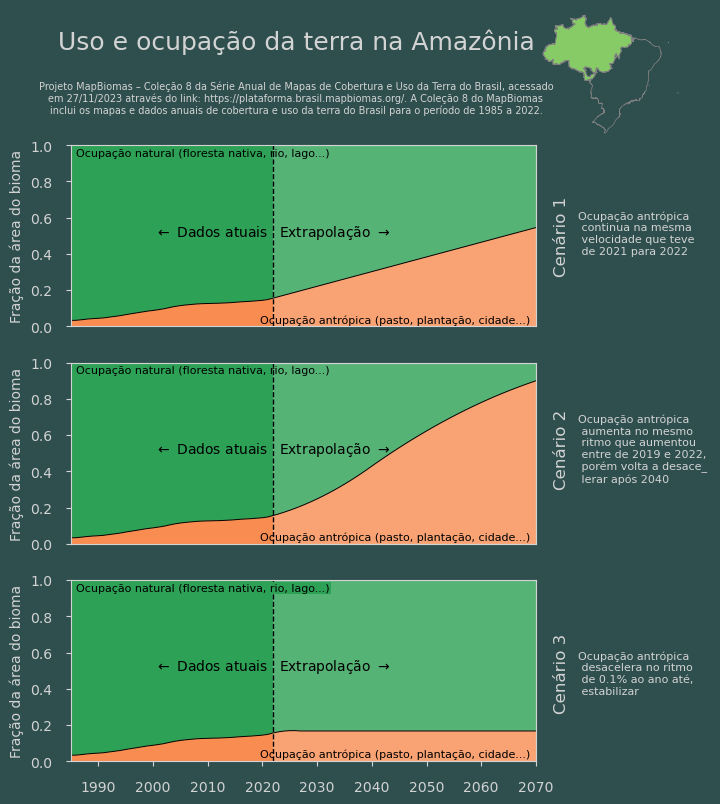

In [31]:
fig, ax = plt.subplots(3, 1, figsize = (6,8))

ax[0].fill_between(areas_amazon_biome_cenario1['Ano'], 0, 1, color = 'grey')
ax[0].fill_between(areas_amazon_biome_cenario1['Ano'], 0,
                 areas_amazon_biome_cenario1['Vegetação_natural'] + areas_amazon_biome_cenario1['Uso_antrópico'],
                 color = sns.color_palette('RdYlGn_r', 7)[0])
ax[0].fill_between(areas_amazon_biome_cenario1['Ano'], 0,
                 areas_amazon_biome_cenario1['Uso_antrópico'],
                 color = sns.color_palette('RdYlGn_r', 7)[5])
ax[0].plot(areas_amazon_biome_cenario1['Ano'], areas_amazon_biome_cenario1['Uso_antrópico'],
                 color = 'black', lw = 0.7)

ax[0].text(1986, 0.94, 'Ocupação natural (floresta nativa, rio, lago...)',
           color = 'black', fontsize = 8)
ax[0].text(2069, 0.02, 'Ocupação antrópica (pasto, plantação, cidade...)',
           color = 'black', fontsize = 8, ha = 'right')
ax[0].set_xlim(1985, 2070)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Fração da área do bioma', fontsize = 10, color = 'lightgrey')
ax[0].set_xticks([])
ax[0].tick_params(axis='both', colors='lightgrey', pad=10)
for spine in ax[0].spines.values():
    spine.set_edgecolor('lightgrey')

ax[0].axvline(2022, lw = 1, color = 'black', ls = '--')
ax[0].fill_between([i for i in range(2022,2071)], 0, 1, color = 'white', alpha = 0.2)
ax[0].text(2023, 0.5, r'Extrapolação $\rightarrow$')
ax[0].text(2021, 0.5, r'$\leftarrow$ Dados atuais', ha = 'right')

################################################################################

ax[1].fill_between(areas_amazon_biome_cenario2['Ano'], 0, 1, color = 'grey')
ax[1].fill_between(areas_amazon_biome_cenario2['Ano'], 0,
                 areas_amazon_biome_cenario2['Vegetação_natural'] + areas_amazon_biome_cenario2['Uso_antrópico'],
                 color = sns.color_palette('RdYlGn_r', 7)[0])
ax[1].fill_between(areas_amazon_biome_cenario2['Ano'], 0,
                 areas_amazon_biome_cenario2['Uso_antrópico'],
                 color = sns.color_palette('RdYlGn_r', 7)[5])
ax[1].plot(areas_amazon_biome_cenario2['Ano'], areas_amazon_biome_cenario2['Uso_antrópico'],
                 color = 'black', lw = 0.7)

ax[1].text(1986, 0.94, 'Ocupação natural (floresta nativa, rio, lago...)',
           color = 'black', fontsize = 8)
ax[1].text(2069, 0.02, 'Ocupação antrópica (pasto, plantação, cidade...)',
           color = 'black', fontsize = 8, ha = 'right')
ax[1].set_xlim(1985, 2070)
ax[1].set_ylim(0, 1)
ax[1].set_ylabel('Fração da área do bioma', fontsize = 10, color = 'lightgrey')
ax[1].set_xticks([])
ax[1].tick_params(axis='both', colors='lightgrey', pad=10)
for spine in ax[1].spines.values():
    spine.set_edgecolor('lightgrey')

ax[1].axvline(2022, lw = 1, color = 'black', ls = '--')
ax[1].fill_between([i for i in range(2022,2071)], 0, 1, color = 'white', alpha = 0.2)
ax[1].text(2023, 0.5, r'Extrapolação $\rightarrow$')
ax[1].text(2021, 0.5, r'$\leftarrow$ Dados atuais', ha = 'right')

################################################################################

ax[2].fill_between(areas_amazon_biome_cenario3['Ano'], 0, 1, color = 'grey')
ax[2].fill_between(areas_amazon_biome_cenario3['Ano'], 0,
                 areas_amazon_biome_cenario3['Vegetação_natural'] + areas_amazon_biome_cenario3['Uso_antrópico'],
                 color = sns.color_palette('RdYlGn_r', 7)[0])
ax[2].fill_between(areas_amazon_biome_cenario3['Ano'], 0,
                 areas_amazon_biome_cenario3['Uso_antrópico'],
                 color = sns.color_palette('RdYlGn_r', 7)[5])
ax[2].plot(areas_amazon_biome_cenario3['Ano'], areas_amazon_biome_cenario3['Uso_antrópico'],
                 color = 'black', lw = 0.7)

ax[2].text(1986, 0.94, 'Ocupação natural (floresta nativa, rio, lago...)',
           color = 'black', fontsize = 8,
           bbox = dict(facecolor = sns.color_palette('RdYlGn_r', 7)[0], pad = 1, edgecolor = 'none'))
ax[2].text(2069, 0.02, 'Ocupação antrópica (pasto, plantação, cidade...)',
           color = 'black', fontsize = 8, ha = 'right')
ax[2].set_xlim(1985, 2070)
ax[2].set_ylim(0, 1)
ax[2].set_ylabel('Fração da área do bioma', fontsize = 10, color = 'lightgrey')
ax[2].tick_params(axis='both', colors='lightgrey', pad=10)
for spine in ax[2].spines.values():
    spine.set_edgecolor('lightgrey')

ax[2].axvline(2022, lw = 1, color = 'black', ls = '--')
ax[2].fill_between([i for i in range(2022,2071)], 0, 1, color = 'white', alpha = 0.2)
ax[2].text(2023, 0.5, r'Extrapolação $\rightarrow$')
ax[2].text(2021, 0.5, r'$\leftarrow$ Dados atuais', ha = 'right')

################################################################################

fig.text(0.5, 1, 'Uso e ocupação da terra na Amazônia', fontsize = 18, ha = 'center',
         color = 'lightgrey')
fig.text(0.5, 0.92, 'Projeto MapBiomas – Coleção 8 da Série Anual de Mapas de Cobertura e Uso da Terra do Brasil, acessado'
'\n'
'em 27/11/2023 através do link: https://plataforma.brasil.mapbiomas.org/. A Coleção 8 do MapBiomas'
'\n'
'inclui os mapas e dados anuais de cobertura e uso da terra do Brasil para o período de 1985 a 2022.',
         ha = 'center', color = 'lightgrey', fontsize = 7)

fig.text(0.93, 0.72, 'Cenário 1', fontsize = 12, color = 'lightgrey',
         rotation = 90)
fig.text(0.97, 0.77, 'Ocupação antrópica \n continua na mesma \n velocidade que teve \n de 2021 para 2022',
         fontsize = 8, color = 'lightgrey', va = 'center')
fig.text(0.93, 0.5, 'Cenário 2', fontsize = 12, color = 'lightgrey',
         rotation = 90, va = 'center')
fig.text(0.97, 0.5, 'Ocupação antrópica \n aumenta no mesmo \n ritmo que aumentou \n entre de 2019 e 2022, \n porém volta a desace_ \n lerar após 2040',
         fontsize = 8, color = 'lightgrey', va = 'center')
fig.text(0.93, 0.22, 'Cenário 3', fontsize = 12, color = 'lightgrey',
         rotation = 90, va = 'center')
fig.text(0.97, 0.22, 'Ocupação antrópica \n desacelera no ritmo \n de 0.1% ao ano até, \n estabilizar',
         fontsize = 8, color = 'lightgrey', va = 'center')

################################################################################
newax = fig.add_axes([0.9, 0.8, 0.25, 0.25], anchor = 'NE', zorder = 0)
am.plot(facecolor = sns.color_palette('RdYlGn_r', 7)[1], edgecolor='grey', figsize=(6,6),
              lw = 0.5, alpha = 1, ax = newax)
br.plot(facecolor = 'none', edgecolor='grey', figsize=(6,6),
              lw = 0.5, alpha = 1, ax = newax)
newax.axis('off')

fig.patch.set_facecolor('darkslategrey')
# plt.savefig('Plots/Uso_terra_Amazonia_historico_cenarios.png', dpi = 300, bbox_inches = 'tight')
plt.show()

# Cerrado

In [32]:
df = pd.read_csv(f'Data/Natural_antropico_historico_Cerrado.csv')
# Dados de área em hectares

In [33]:
areas_cerrado_biome = {}
areas_cerrado_biome['Ano'] = [i for i in range(1985,2023)]
areas_cerrado_biome['Uso_antrópico'] = []
areas_cerrado_biome['Vegetação_natural'] = []
areas_cerrado_biome['Area_total'] = []
areas_cerrado_biome['Area_uso_antrópico'] = []
areas_cerrado_biome['Area_vegetação_natural'] = []
areas_cerrado_biome['Area_outros'] = []
areas_cerrado_biome['Outros'] = []

for i in tqdm(range(1985,2023)):
    # print(df.iloc[14])
    antro_area = df.iloc[14][f'{i}']
    natural_area = df.iloc[0][f'{i}']
    outros = df.iloc[30][f'{i}']
    tot_area = antro_area + natural_area + outros

    areas_cerrado_biome['Uso_antrópico'].append(antro_area/tot_area)
    areas_cerrado_biome['Area_uso_antrópico'].append(antro_area)
    areas_cerrado_biome['Area_vegetação_natural'].append(natural_area)
    areas_cerrado_biome['Vegetação_natural'].append(natural_area/tot_area)
    areas_cerrado_biome['Area_total'].append(tot_area)
    areas_cerrado_biome['Area_outros'].append(outros)
    areas_cerrado_biome['Outros'].append(outros/tot_area)

100%|██████████| 38/38 [00:00<00:00, 1369.52it/s]


In [34]:
areas_cerrado_biome = pd.DataFrame(areas_cerrado_biome)

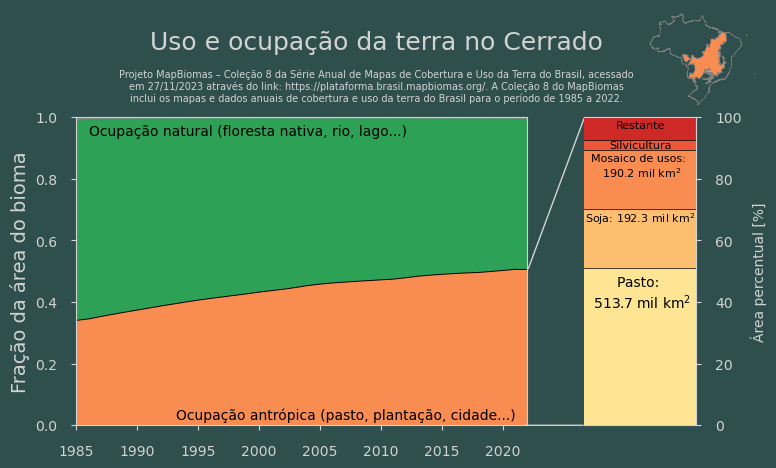

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (8,4), gridspec_kw = {'width_ratios': [4,1]})

ax[0].fill_between(areas_cerrado_biome['Ano'], 0, 1, color = 'grey')
ax[0].fill_between(areas_cerrado_biome['Ano'], 0,
                 areas_cerrado_biome['Vegetação_natural'] + areas_cerrado_biome['Uso_antrópico'],
                 color = sns.color_palette('RdYlGn_r', 7)[0])
ax[0].fill_between(areas_cerrado_biome['Ano'], 0,
                 areas_cerrado_biome['Uso_antrópico'],
                 color = sns.color_palette('RdYlGn_r', 7)[5])
ax[0].plot(areas_cerrado_biome['Ano'], areas_cerrado_biome['Uso_antrópico'],
                 color = 'black', lw = 0.7)

ax[0].text(1986, 0.94, 'Ocupação natural (floresta nativa, rio, lago...)',
           color = 'black', fontsize = 10)
ax[0].text(2021, 0.02, 'Ocupação antrópica (pasto, plantação, cidade...)',
           color = 'black', fontsize = 10, ha = 'right')
ax[0].set_xlim(1985, 2022)
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Fração da área do bioma', fontsize = 14, color = 'lightgrey')
ax[0].tick_params(axis='both', colors='lightgrey', pad=10)
for spine in ax[0].spines.values():
    spine.set_edgecolor('lightgrey')



total_antro_area = areas_cerrado_biome['Area_uso_antrópico'][37]

ax[1].bar(0, 1,
          color = sns.color_palette('RdYlGn_r', 11)[10])
ax[1].bar(0, df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True).head(4)['2022'].sum()/total_antro_area,
          color = sns.color_palette('RdYlGn_r', 11)[9], edgecolor = 'black', lw = 0.5)
ax[1].bar(0, df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True).head(3)['2022'].sum()/total_antro_area,
          color = sns.color_palette('RdYlGn_r', 11)[8], edgecolor = 'black', lw = 0.5)
ax[1].bar(0, df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True).head(2)['2022'].sum()/total_antro_area,
          color = sns.color_palette('RdYlGn_r', 11)[7], edgecolor = 'black', lw = 0.5)
ax[1].bar(0, df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True).head(1)['2022'].sum()/total_antro_area,
          color = sns.color_palette('RdYlGn_r', 11)[6], edgecolor = 'black', lw = 0.5)

ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[1].set_ylim(0, 1)
ax[1].set_xlim(-0.3, 0.3)
ax[1].set_ylabel('Área percentual [%]', labelpad = 6, color='lightgrey')
ax[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax[1].set_yticklabels([0, 20, 40, 60, 80, 100])
ax[1].set_xticks([])
ax[1].tick_params(axis='both', colors='lightgrey', pad=10)
ax[1].spines['left'].set_visible(False)
for spine in ax[1].spines.values():
    spine.set_edgecolor('lightgrey')

area_pasture = df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True)['2022'][0]
area_soybean = df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True)['2022'][1]
area_mosaico = df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True)['2022'][2]
area_silvi = df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True)['2022'][3]

ax[1].text(0, 0.95*df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True).head(1)['2022'].sum()/total_antro_area,
           f"Pasto: \n {area_pasture/1e5:.1f} mil km$^2$",
           ha = 'center', va = 'top')
ax[1].text(0, 0.99*df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True).head(2)['2022'].sum()/total_antro_area,
           f'Soja: {area_soybean/1e5:.1f} mil km$^2$', ha = 'center', va = 'top', fontsize = 8)
ax[1].text(0, 0.99*df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True).head(3)['2022'].sum()/total_antro_area,
           f'Mosaico de usos: \n {area_mosaico/1e5:.1f} mil km$^2$', ha = 'center', va = 'top', fontsize = 8)
ax[1].text(0, df.iloc[15:30].sort_values('2022', ascending=False).reset_index(drop = True).head(4)['2022'].sum()/total_antro_area,
           f'Silvicultura', ha = 'center', va = 'top', fontsize = 8)
ax[1].text(0, 0.99, 'Restante', ha = 'center', va = 'top', fontsize = 8)

ax[0].annotate('', xy=(1, 0.5), xycoords='axes fraction', xytext=(1.128, 1.005),
            arrowprops=dict(arrowstyle="-", color='lightgrey', lw = 1))
ax[0].annotate('', xy=(0.99, 0), xycoords='axes fraction', xytext=(1.13, 0),
            arrowprops=dict(arrowstyle="-", color='lightgrey', lw = 1))

fig.text(0.5, 1.05, 'Uso e ocupação da terra no Cerrado', fontsize = 18, ha = 'center',
         color = 'lightgrey')
fig.text(0.5, 0.92, 'Projeto MapBiomas – Coleção 8 da Série Anual de Mapas de Cobertura e Uso da Terra do Brasil, acessado'
'\n'
'em 27/11/2023 através do link: https://plataforma.brasil.mapbiomas.org/. A Coleção 8 do MapBiomas'
'\n'
'inclui os mapas e dados anuais de cobertura e uso da terra do Brasil para o período de 1985 a 2022.',
         ha = 'center', color = 'lightgrey', fontsize = 7)
newax = fig.add_axes([0.73, 0.9, 0.25, 0.25], anchor = 'NE', zorder = 0)
ce.plot(facecolor = sns.color_palette('RdYlGn_r', 7)[5], edgecolor='grey', figsize=(6,6),
              lw = 0.3, alpha = 1, ax = newax)
br.plot(facecolor = 'none', edgecolor='grey', figsize=(6,6),
              lw = 0.5, alpha = 1, ax = newax)
newax.axis('off')

fig.patch.set_facecolor('darkslategrey')
# plt.savefig('Plots/Uso_terra_Cerrado_historico.png', dpi = 300, bbox_inches = 'tight')
plt.show()

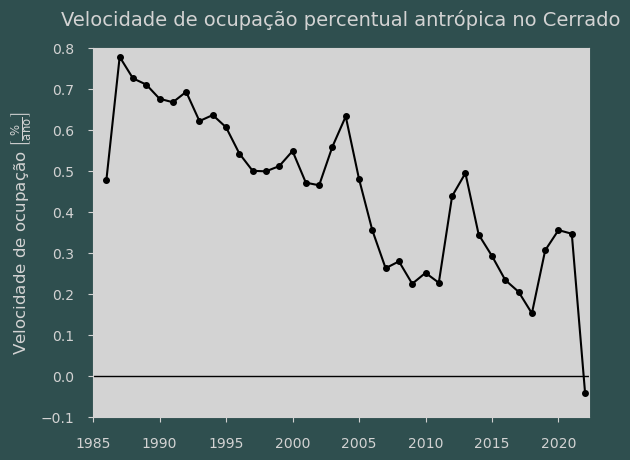

In [36]:
fig, ax = plt.subplots()
plt.plot(areas_cerrado_biome['Ano'][1:], 100*np.diff(areas_cerrado_biome['Uso_antrópico'])/np.diff(areas_cerrado_biome['Ano']),
         color = 'black', marker = 'o', markersize = 4)
plt.xlim(1985,2022.3)
plt.ylim(-0.1, 0.8)
plt.axhline(0, lw = 1, color = 'black')

plt.ylabel(r'Velocidade de ocupação $\left[ \frac{\%}{\mathrm{ano}} \right]$', fontsize = 12, color = 'lightgrey')
ax.tick_params(axis='both', colors='lightgrey', pad=10)
for spine in ax.spines.values():
    spine.set_edgecolor('lightgrey')

plt.title('Velocidade de ocupação percentual antrópica no Cerrado', fontsize = 14, color = 'lightgrey',
          pad = 16)
fig.patch.set_facecolor('darkslategrey')
for ax in fig.axes:
    ax.patch.set_facecolor('lightgrey')

# plt.savefig('Plots/Velocidade_ocupacao_Cerrado.png', dpi = 400, bbox_inches = 'tight')
plt.show()